# 데이터 종류 및 개수 확인

## 1. 기존 데이터셋 확인 

In [1]:
from PIL import Image
import matplotlib.pylab as plt

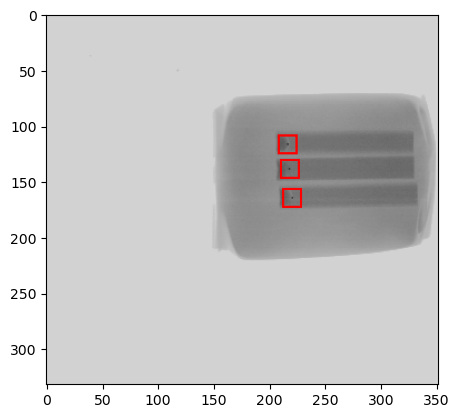

In [2]:
i = Image.open('C:/test1/yolov3/X선이물검출기(06.23_09.22)/1호기(2020.09.22)/SN77128_20200622_NgImage/002_20200622_203053(2).bmp')
 # 진짜...이거 시작부터 눈이 박살나는 구
plt.imshow(i)
plt.show()

## 2. 데이터셋 재정리

진짜 여기서 얼마를 소비한거냐.....

In [3]:
import os
import shutil

# 원본 이미지가 저장된 디렉토리의 경로
source_dir = 'C:/test1/yolov3/X선이물검출기(06.23_09.22)'

# 새로운 디렉토리 경로
target_dir_base = 'C:/test1/yolov3/X선이물검출기'

# 원본 디렉토리에서 각 '호기(2020.09.22)' 폴더를 순회
for i, ho_folder in enumerate(sorted(os.listdir(source_dir))):
    ho_folder_path = os.path.join(source_dir, ho_folder)
    
    # '호기' 폴더 내부를 확인하여 'NgImage' 폴더가 있는지 검사
    if os.path.isdir(ho_folder_path):
        for ng_folder in os.listdir(ho_folder_path):
            if 'NgImage' in ng_folder:
                ng_folder_path = os.path.join(ho_folder_path, ng_folder)
                
                # 해당 'NgImage' 폴더 내의 파일들을 복사할 새로운 '호기' 폴더 생성
                target_ho_folder = os.path.join(target_dir_base, f"{i+1}호기")
                os.makedirs(target_ho_folder, exist_ok=True)
                
                # 'NgImage' 폴더 내의 파일들을 새로운 위치로 복사
                for file in os.listdir(ng_folder_path):
                    source_file_path = os.path.join(ng_folder_path, file)
                    target_file_path = os.path.join(target_ho_folder, file)
                    shutil.copy(source_file_path, target_file_path)

print("모든 .bmp 파일이 성공적으로 복사되었습니다.")


모든 .bmp 파일이 성공적으로 복사되었습니다.


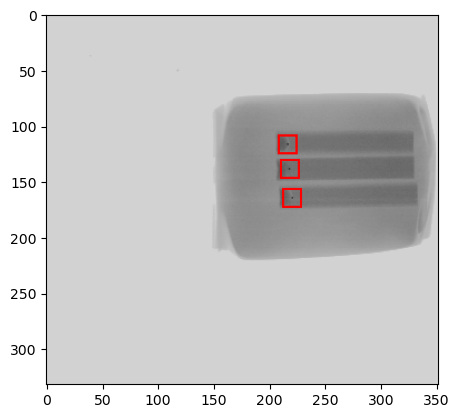

In [4]:
im = Image.open('C:/test1/yolov3/X선이물검출기/1호기/002_20200622_203053(2).bmp')

plt.imshow(im)
plt.show()

# [단계 ③] 데이터 정제(전처리)

In [5]:
# labeling tool을 실행합니다.
# (로컫디스크 C에 Labeling tool폴더를 옮겨놓으셔야 합니다.)
# "C:/OpenLabeling-masterwmainWinput"경로에 라벧링할 이미지들을 옮겨 놓습니다.
!python C:/OpenLabeling-master/main/main.py

-> Please ignore this error message

Showing image 0/212, path: input\001_20200622_203305(8).bmp
Welcome!
 Press [h] for help.
Showing image 1/212, path: input\001_20200622_203309(1).bmp
Showing image 1/212, path: input\001_20200622_203309(1).bmp
Showing image 2/212, path: input\001_20200622_203312(6).bmp
Showing image 2/212, path: input\001_20200622_203312(6).bmp
Showing image 3/212, path: input\001_20200622_203316(0).bmp
Showing image 3/212, path: input\001_20200622_203316(0).bmp
Showing image 4/212, path: input\001_20200622_203319(4).bmp
Showing image 4/212, path: input\001_20200622_203319(4).bmp
Showing image 5/212, path: input\001_20200622_203330(3).bmp
Showing image 5/212, path: input\001_20200622_203330(3).bmp
Showing image 6/212, path: input\001_20200623_003516(8).bmp
Showing image 6/212, path: input\001_20200623_003516(8).bmp
Showing image 7/212, path: input\001_20200623_003520(5).bmp
Showing image 7/212, path: input\001_20200623_003520(5).bmp
Showing image 8/212, path: input\

1호기에 1~15번까지 데이터를 복사해서 input 폴더에 옮겨두었습니다.

# [단계 ④] 데이터 특성 파악

## 1. 라벨링된 이미지 데이터 확인 및 라벨 관련 좌표 확인

- 라벨링 작업을 수행한 후 기존 이미지 파일과 라벨링 작업을 통해 구한 좌표 텍스트 파일은 다음과 같다.

- 상단은 원본 이미지의 일부로 [OpenLabeling-master > main > input] 폴더에 위치하고, 
하단은 라벨링 좌표(x, y, h, w)가 포함된 텍스트 파일로 [OpenLabeling-master > main > output > YOLO_darknet] 폴더에 위치한다.

## 2. 라벨링 결과물 이동 및 확장자 변환하기

In [17]:
%cd C:/test1/yolov3/images
!ren *.* *.jpg*

C:\test1\yolov3\images


# [단계 ⑤] 학습/평가 데이터 분리

## 1. 학습 및 평가 데이터 구분

In [18]:
%cd C:/test1/yolov3

C:\test1\yolov3


In [19]:
import random
import os
import subprocess
import sys

In [20]:
import os
import random

def split_data_set(image_dir):
    # 테스트 세트를 저장할 파일을 'test.txt'로, 훈련 세트를 저장할 파일을 'train.txt'로 엽니다.
    f_val = open("test.txt", 'w')
    f_train = open("train.txt", 'w')

    # 지정된 디렉토리에서 파일 목록을 가져옵니다.
    path, dirs, files = next(os.walk(image_dir))
    data_size = len(files)  # 전체 데이터 크기를 계산합니다.

    ind = 0
    data_test_size = int(0.2 * data_size)  # 전체 데이터의 20%를 테스트 세트 크기로 설정합니다.
    test_array = random.sample(range(data_size), k=data_test_size)  # 테스트 세트에 사용할 파일 인덱스를 무작위로 선택합니다.

    # 디렉토리 내의 모든 파일을 순회합니다.
    for f in os.listdir(image_dir):
        if f.endswith('.jpg'):  # 파일 확장자가 .jpg인 경우만 처리합니다.
            ind += 1

            # 파일 인덱스가 테스트 배열에 포함되어 있으면 테스트 세트로, 그렇지 않으면 훈련 세트로 분류합니다.
            if ind in test_array:
                f_val.write(image_dir + '/' + f + '\n')  # 테스트 세트 파일에 이미지 경로를 기록합니다.
            else:
                f_train.write(image_dir + '/' + f + '\n')  # 훈련 세트 파일에 이미지 경로를 기록합니다.

    # 파일을 닫아 리소스를 해제합니다.
    f_val.close()
    f_train.close()

In [21]:
image_dir="C:/test1/yolov3/images"

In [22]:
split_data_set(image_dir)

# [단계 ⑥] 모델 구축

## 1. 모델 학습 수행을 위한 준비

In [23]:
classes= 1
train= 'C:/test1/yolov3/train.txt'
valid= 'C:/test1/yolov3/valid.txt'
names= 'C:/test1/yolov3/data/classes.names'

defect 로 되어있는지 다시 확인!

In [24]:
!pip install -r requirements.txt

# [단계 ⑦] 모델 훈련

## 1. 모델 학습 수행

In [29]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
!python train.py --epochs 15 --weights weights/last.pt --batch-size 3 --cfg yolov3-spp.cfg --data custom.data --nosave --device cpu

# [단계 ⑧] 결과 분석 및 해석

## 1. 객체 탐지 수행

In [ ]:
!python detect.py --weights weights/last.pt --source images --cfg yolov3-spp.cfg --names classes.names --output result --device cpu

## 2. 모델 성능 평가

In [ ]:
!python test.py --cfg yolov3-spp.cfg --batch-size 5 --data custom.data --weights weights/last.pt --device cpu

In [28]:
!python test.py --cfg yolov3-spp.cfg --data custom.data --weights weights/last.pt 

Namespace(cfg='yolov3-spp.cfg', data='custom.data', weights='weights/last.pt', batch_size=16, img_size=512, conf_thres=0.001, iou_thres=0.6, save_json=False, task='test', device='', single_cls=False, augment=False)
Using CPU

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.25465e+07 parameters, 6.25465e+07 gradients
                 all        41       115     0.261      0.13     0.273     0.174
Speed: 364.5/1.0/365.5 ms inference/NMS/total per 512x512 image at batch-size 16



  0%|          | 0/41 [00:00<?, ?it/s]
Caching labels C:\test1\yolov3\test.txt (41 found, 0 missing, 0 empty, 0 duplicate, for 41 images): 100%|##########| 41/41 [00:00<00:00, 5126.29it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/3 [00:00<?, ?it/s]C:\Users\mit14\cuda\Lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

               Class    Images   Targets         P         R   mAP@0.5        F1:  33%|###3      | 1/3 [00:10<00:20, 10.04s/it]
               Class    Images   Targets         P         R   mAP@0.5        F1:  67%|######6   | 2/3 [00:15<00:07,  7.48s/it]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|##########| 3/3 [00:19<00:00,  5.87s